## GEOREFPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/11_georef.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [1]:
# %pip install vgridpandas

### Latlong to GEOREF

In [2]:
import pandas as pd
from vgridpandas import georefpandas          
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.head(100)
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
resolution = 2
df = df.georef.latlon2georef(resolution)
df.head()

lon        lat  passenger_count  georef_res
georef                                                     
HJBL0045 -73.993896  40.750111                1           2
HJBL0144 -73.976425  40.739811                1           2
HJBL0145 -73.968704  40.754246                5           2
HJBL0846 -73.863060  40.769581                5           2
HJBL0346 -73.945541  40.779423                1           2

### GEOREF to geo boundary

In [3]:
df = df.georef.georef2geo()
df.head()

lon        lat  passenger_count  georef_res  \
georef                                                        
HJBL0045 -73.993896  40.750111                1           2   
HJBL0144 -73.976425  40.739811                1           2   
HJBL0145 -73.968704  40.754246                5           2   
HJBL0846 -73.863060  40.769581                5           2   
HJBL0346 -73.945541  40.779423                1           2   

                                                   geometry  
georef                                                       
HJBL0045  POLYGON ((-74 40.75, -73.98333 40.75, -73.9833...  
HJBL0144  POLYGON ((-73.98333 40.73333, -73.96667 40.733...  
HJBL0145  POLYGON ((-73.98333 40.75, -73.96667 40.75, -7...  
HJBL0846  POLYGON ((-73.86667 40.76667, -73.85 40.76667,...  
HJBL0346  POLYGON ((-73.95 40.76667, -73.93333 40.76667,...

### GEOREF point binning

<Axes: >

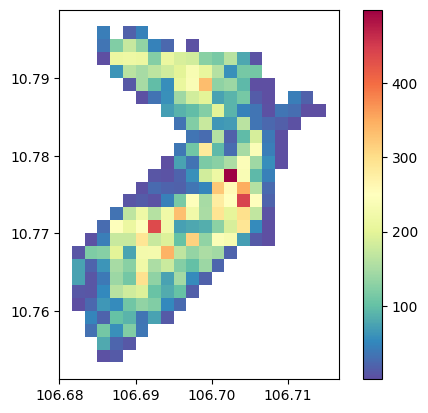

In [4]:
import geopandas as gpd
from vgridpandas import georefpandas
# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
resolution = 3
stats = "count"
df_bin = df.georef.georefbin(resolution=resolution, stats = stats, 
                                # numeric_column="confidence",
                                # category_column="category",
                                return_geometry=True)
df_bin.plot(        
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)